### Задание 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse, r2_score as r2
from sklearn.preprocessing import StandardScaler

In [22]:
boston = load_boston()
data = boston["data"]
target = boston["target"]
feature_names = boston["feature_names"]

X = pd.DataFrame(data, columns=feature_names)
y = pd.DataFrame(target, columns=["price"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state = 100)

In [23]:
def evaluate_preds(true_val, pred_val):
    print("R2:\t" + str(round(r2(true_val, pred_val), 3)) + "\n" +
          "RMSE:\t" + str(round(np.sqrt(mse(true_val, pred_val)), 3)) + "\n" +
          "MSE:\t" + str(round(mse(true_val, pred_val), 3))
         )
    
    sns.set(style="ticks")
    
    check_test = pd.DataFrame({
    "y_true": true_val['price'],
    "y_pred": pred_val.flatten(),
    })
      
    grid = sns.JointGrid(data = check_test, x='y_pred', y='y_true', height=8)
    grid.plot_joint(plt.scatter, color="g")
    plt.plot([0, 50], [0, 50], linestyle='--', color='black', linewidth=2)

R2:	0.753
RMSE:	4.367
MSE:	19.067


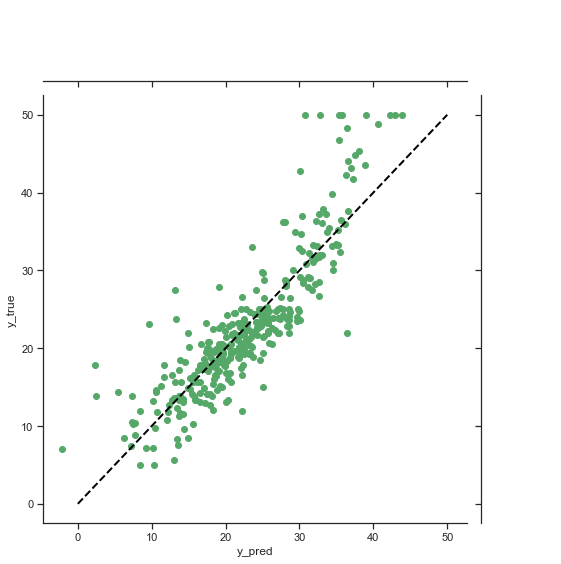

In [24]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_train)

evaluate_preds(y_train, y_pred)

R2:	0.706
RMSE:	5.459
MSE:	29.799


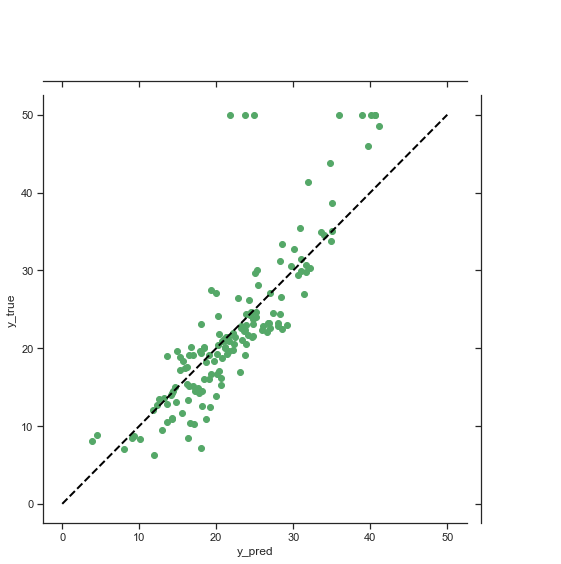

In [25]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

evaluate_preds(y_test, y_pred)

### Задание 2

In [6]:
from sklearn.ensemble import RandomForestRegressor

R2:	0.979
RMSE:	1.273
MSE:	1.62


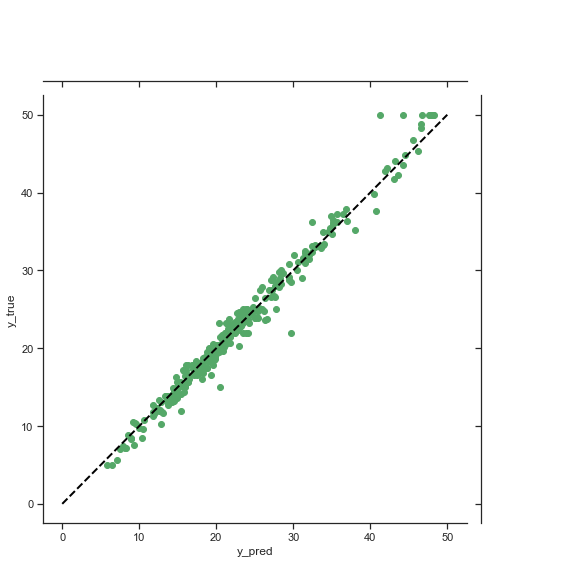

In [26]:
model = RandomForestRegressor(n_estimators=1000, max_depth=12, random_state=100)
model.fit(X_train, y_train.values[:, 0])
y_pred_forest = model.predict(X_train)

evaluate_preds(y_train, y_pred_forest)

R2:	0.805
RMSE:	4.441
MSE:	19.722


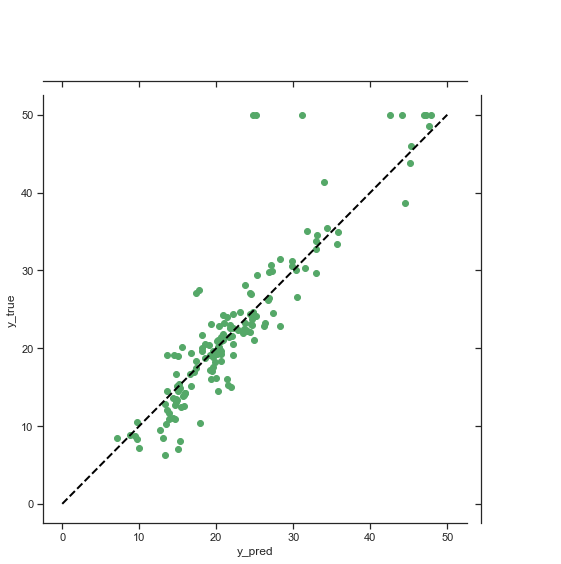

In [27]:
model = RandomForestRegressor(n_estimators=1000, max_depth=12, random_state=100)
model.fit(X_train, y_train.values[:, 0])
y_pred_forest = model.predict(X_test)

evaluate_preds(y_test, y_pred_forest)

0.98 и 0.805 - переобучение

### Задание 3

In [9]:
fi = model.feature_importances_

sum_fi = 0
for el in fi:
    sum_fi =+ el

print ('Сумма показателей важности =', sum_fi)

Сумма показателей важности = 0.35504037155868146


In [10]:
fi_ = sorted(fi)

print('2 наиболее важных признака:')
print(fi_[len(fi_)-1], '\t', fi_[len(fi_)-2])

2 наиболее важных признака:
0.47924351905156753 	 0.35504037155868146


### Задание 4

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

In [12]:
ccfd = pd.read_csv(r'C:\Users\Катя\Desktop\gb\pythlib\2\creditcard.csv')

In [13]:
value_counts_info = ccfd.Class.value_counts(normalize=True)
print(value_counts_info)

0    0.998273
1    0.001727
Name: Class, dtype: float64


Результат несбалансированной выборки

In [14]:
ccfd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [15]:
X = ccfd.copy()
X.drop(['Class'], axis=1, inplace=True)
y = pd.Series(ccfd['Class'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)


In [16]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199364 entries, 222925 to 271
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    199364 non-null  float64
 1   V1      199364 non-null  float64
 2   V2      199364 non-null  float64
 3   V3      199364 non-null  float64
 4   V4      199364 non-null  float64
 5   V5      199364 non-null  float64
 6   V6      199364 non-null  float64
 7   V7      199364 non-null  float64
 8   V8      199364 non-null  float64
 9   V9      199364 non-null  float64
 10  V10     199364 non-null  float64
 11  V11     199364 non-null  float64
 12  V12     199364 non-null  float64
 13  V13     199364 non-null  float64
 14  V14     199364 non-null  float64
 15  V15     199364 non-null  float64
 16  V16     199364 non-null  float64
 17  V17     199364 non-null  float64
 18  V18     199364 non-null  float64
 19  V19     199364 non-null  float64
 20  V20     199364 non-null  float64
 21  V21     

In [17]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85443 entries, 262922 to 198375
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    85443 non-null  float64
 1   V1      85443 non-null  float64
 2   V2      85443 non-null  float64
 3   V3      85443 non-null  float64
 4   V4      85443 non-null  float64
 5   V5      85443 non-null  float64
 6   V6      85443 non-null  float64
 7   V7      85443 non-null  float64
 8   V8      85443 non-null  float64
 9   V9      85443 non-null  float64
 10  V10     85443 non-null  float64
 11  V11     85443 non-null  float64
 12  V12     85443 non-null  float64
 13  V13     85443 non-null  float64
 14  V14     85443 non-null  float64
 15  V15     85443 non-null  float64
 16  V16     85443 non-null  float64
 17  V17     85443 non-null  float64
 18  V18     85443 non-null  float64
 19  V19     85443 non-null  float64
 20  V20     85443 non-null  float64
 21  V21     85443 non-null  float

In [18]:
params = [{'n_estimators': [10, 15],
               'max_features': np.arange(3, 5),
               'max_depth': np.arange(4, 7)}
         ]

clf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=100),
    param_grid=params,
    scoring='roc_auc',
    cv=3,
)

In [19]:
clf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=100),
             param_grid=[{'max_depth': array([4, 5, 6]),
                          'max_features': array([3, 4]),
                          'n_estimators': [10, 15]}],
             scoring='roc_auc')

In [20]:
# Параметры лучшей модели
clf.best_params_

{'max_depth': 6, 'max_features': 3, 'n_estimators': 15}

In [21]:
# AUC
clf.predict_proba(X)

y_pred_proba = clf.predict_proba(X)[0:,1]
y_pred_proba

y_true = np.array(y)
y_scores = np.array(y_pred_proba)
roc_auc_score(y_true, y_scores)

0.9630902415719197